In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

# EDA 

In [47]:
df=pd.read_csv('/content/bbc-text.csv')

SHAPE OF DATASET:  (2225, 2) 

COLUMNS IN DATASET:  Index(['category', 'text'], dtype='object') 

CATEGORIES:  ['tech' 'business' 'sport' 'entertainment' 'politics'] 

DATA SAMPLE: 

            category                                               text
521            tech  bt offers free net phone calls bt is offering ...
2069          sport  ferguson puts faith in youngsters manchester u...
1164       business  cactus diet deal for phytopharm a slimming aid...
966        business  italy to get economic action plan italian prim...
1047  entertainment  uk directors guild nominees named martin scors... 


NUMBER OF SAMPLES IN EACH CATEGORY: 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


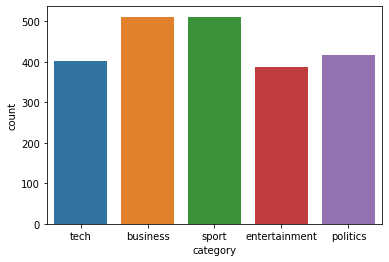

In [48]:
print('SHAPE OF DATASET: ', df.shape, '\n\nCOLUMNS IN DATASET: ', df.columns, '\n\nCATEGORIES: ', df.category.unique(), '\n\nDATA SAMPLE: \n\n', df.sample(n=5), '\n\n')


print('NUMBER OF SAMPLES IN EACH CATEGORY: \n')
sns.countplot(df.category)

In [49]:
df.isnull().sum()

category    0
text        0
dtype: int64

In [50]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

# SVC Classifier Model

In [51]:
x=df['text']

In [52]:
y=df['category']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [57]:
!pip install pipeline


In [58]:
from sklearn.pipeline import Pipeline

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC


In [60]:
text_clf=Pipeline([('tfidf',TfidfVectorizer()),('clf_SVC',SVC())])

In [61]:
text_clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf_SVC', SVC())])

In [62]:
predictions=text_clf.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix,classification_report

In [65]:
print(classification_report(y_test,predictions))

               precision    recall  f1-score   support

     business       0.93      0.98      0.96       160
entertainment       0.98      0.95      0.96       112
     politics       0.98      0.92      0.95       131
        sport       0.99      0.99      0.99       146
         tech       0.97      1.00      0.98       119

     accuracy                           0.97       668
    macro avg       0.97      0.97      0.97       668
 weighted avg       0.97      0.97      0.97       668



In [66]:
from sklearn import metrics

In [67]:
print(metrics.accuracy_score(y_test,predictions)*100)

97.0059880239521


In [70]:
text_clf.predict(['Apple to build factory in Hong Kong'])

array(['business'], dtype=object)

# Multinominal Naive Baye's Model

In [71]:
from sklearn.naive_bayes import MultinomialNB

In [72]:
text_clf1=Pipeline([('tfidf',TfidfVectorizer()),('clf_MNB',MultinomialNB())])

In [73]:
text_clf1.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf_MNB', MultinomialNB())])

In [74]:
predictions_mnb=text_clf1.predict(x_test)

In [78]:
print(classification_report(y_test,predictions_mnb))

               precision    recall  f1-score   support

     business       0.95      0.97      0.96       160
entertainment       1.00      0.85      0.92       112
     politics       0.93      0.95      0.94       131
        sport       0.93      0.99      0.96       146
         tech       0.96      0.97      0.97       119

     accuracy                           0.95       668
    macro avg       0.95      0.95      0.95       668
 weighted avg       0.95      0.95      0.95       668



In [79]:
print(metrics.accuracy_score(y_test,predictions_mnb)*100)


95.05988023952095
